In [4]:
import json

import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import time

from sentence_transformers import SentenceTransformer


# Data Preprocessing

In [3]:
# Открытие и чтение JSON файла
with open('detailed_listing_new.json', 'r') as file:
    data = json.load(file)

listings = pd.read_csv('listings_new.csv')

In [4]:
corpus = []

for i in data:
    text = data[i]['description'] + " " + " ".join([str(x) for x in data[i]['reviews']])  # Объединяем описание и все отзывы
    corpus.append(text)

In [7]:
data = pd.DataFrame(data).T.reset_index()

In [9]:
data = data.rename(columns = {'index': 'ID'})

In [11]:
listings['ID'] = listings['links'].apply(
    lambda x: x.split('/')[len(x.split('/')) - 1])

In [13]:
listings = listings.merge(data, on = 'ID')

In [15]:
listings['guests'] = listings['guests'].apply(lambda x: x.split(' ')[0].replace('+', '')).astype(int)
#listings['bedrooms'] = listings['bedrooms'].apply(lambda x: x.split(' ')[0].replace('студия', '1')).astype(int)
#listings['beds'] = listings['beds'].apply(lambda x: x.split(' ')[0]).astype(int)
#listings['bathrooms'] = listings['bathrooms'].apply(lambda x: x.split(' ')[0]).astype(int)
listings['price'] = listings['price'].apply(lambda x: x.replace('$', '').replace('\xa0', '')).astype(int)

In [17]:
listings['price'] = round(listings['price']/5)

In [19]:
listings['guests'] = np.where(listings['beds'] == 'Суперхозяин', 2, listings['guests'])
listings['bathrooms'] = np.where(listings['beds'] == 'Суперхозяин', '1 ванная', listings['bathrooms'])
listings['beds'] = np.where(listings['beds'] == 'Суперхозяин', '1 кровать', listings['beds'])

In [21]:
listings['bedrooms'] = listings['bedrooms'].apply(lambda x: x.replace(
    'Общая ванная', '1 спальня').replace('студия', '1 спальня'))

listings['bedrooms'] = listings['bedrooms'].apply(lambda x: x.split(' ')[0]).astype(int)

In [23]:
listings['beds'] = listings['beds'].apply(lambda x: x.split(' ')[0]).astype(int)
#listings['bathrooms'] = listings['bathrooms'].apply(lambda x: x.split(' ')[0]).astype(int)

In [25]:
def remove_part(x):
    if '\n' in x:
        return x.split('\n')[1]
    else:
        return x
        
listings['amenities'] = listings['amenities'].apply(lambda amlist: [remove_part(x) for x in amlist])

In [27]:
top_items = listings.explode('amenities')['amenities'].value_counts()
top_items.head(10)

amenities
Датчик дыма                                                267
Датчик угарного газа                                       265
Гости могут готовить                                       261
Утюг                                                       247
Глубокие миски, палочки для еды, тарелки, чашки и т. д.    247
Wi-Fi                                                      238
Кастрюли, сковородки, масло, соль и перец                  227
Плечики                                                    225
Сушильная машина                                           218
Гель для душа                                              216
Name: count, dtype: int64

In [29]:
print(list(top_items.head(10).index))

['Датчик дыма', 'Датчик угарного газа', 'Гости могут готовить', 'Утюг', 'Глубокие миски, палочки для еды, тарелки, чашки и т. д.', 'Wi-Fi', 'Кастрюли, сковородки, масло, соль и перец', 'Плечики', 'Сушильная машина', 'Гель для душа']


In [31]:
required_amenities = list(top_items.head(10).index)

In [207]:
listings.to_json('final_data_v2.json', orient='records', lines=True)

In [107]:
df = pd.read_json('final_data_v2.json', orient='records', lines=True)

In [65]:
check_df = df[(df['review1'].isin(check.review1)) & (df['review2'].isin(check.review2)) & (df['review3'].isin(check.review3))] 

In [73]:
check[0].sum()

43

In [141]:
check_df = check_df[['names', 'links', 'img', 'price', 'rating', 'ID', 'description',
                     'guests', 'bedrooms', 'beds', 'bathrooms', 'amenities']]

In [133]:
df = df[df['ID'].isin(check_df['ID']) == False]

In [135]:
len(df)

223

In [109]:
# Открытие и чтение JSON файла
with open('detailed_listing_new2.json', 'r') as file:
    data = json.load(file)

In [119]:
data = data[['ID', 'reviews']]

In [145]:
check_df['ID'] = check_df['ID'].astype(str)

/var/folders/nr/dvkhlk7923z7lxh9kjf4zm1m0000gn/T/ipykernel_24754/1506181876.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  check_df['ID'] = check_df['ID'].astype(str)


In [147]:
check_df = check_df.merge(data, on = 'ID')

In [153]:
check_df = check_df[['names', 'links', 'img', 'price', 'rating', 'ID', 'description', 'reviews',
                     'guests', 'bedrooms', 'beds', 'bathrooms', 'amenities']]

In [157]:
df = pd.concat([df, check_df])

In [161]:
df.to_json('final_data_v3.json', orient='records', lines=True)

In [451]:
listings = pd.read_json('final_data.json', orient='records', lines=True)

In [453]:
listings = listings.drop_duplicates('description')

In [533]:
listings = listings.reset_index(drop=True)

In [535]:
listings.to_json('final_data_v3.json', orient='records', lines=True)

# Data Analysis

In [8]:
listings = pd.read_json('final_data.json', orient='records', lines=True)

In [10]:
listings

,names,links,img,price,rating,ID,description,reviews,guests,bedrooms,beds,bathrooms,amenities
0,Винтажная квартира на улице G. Kikodze N12,www.airbnb.ru/rooms/20411305,https://a0.muscache.com/im/pictures/438c7599-c...,42,"4,99",20411305,Уютная квартира в винтажном стиле расположена ...,"[Очень хороший, очень со вкусом обставленный д...",2,2,2,1 ванная,"[Фен, Шампунь, Горячая вода, Стиральная машина..."
1,до площади Свободы 50 метров,www.airbnb.ru/rooms/18223226,https://a0.muscache.com/im/pictures/airflow/Ho...,55,"4,99",18223226,Эта красивая квартира имеет отличное расположе...,[Отзывчивый хозяин быстро отвечал на все наши ...,4,1,1,1 ванная,"[Фен, Чистящие средства, Шампунь, Кондиционер,..."
2,Лилия ( старый Тбилиси ),www.airbnb.ru/rooms/34897035,https://a0.muscache.com/im/pictures/c1490961-7...,25,"4,92",34897035,"Уютная, современная, чистая квартира. Кухня в ...","[Хорошее жилье, есть все необходимое для работ...",4,1,3,1 ванная,"[Фен, Чистящие средства, Шампунь, Кондиционер,..."
3,Уютное место в центре города!,www.airbnb.ru/rooms/42052867,https://a0.muscache.com/im/pictures/06b40454-c...,41,"4,99",42052867,Очень красивая и уютная квартира в центре Тбил...,[Жилье Эки идеально соответствует объявлению.Я...,3,1,2,1 ванная,"[Вид на город, Фен, Чистящие средства, Шампунь..."
4,Жилье Кети,www.airbnb.ru/rooms/12394534,https://a0.muscache.com/im/pictures/hosting/Ho...,54,"4,89",12394534,Квартира расположена в центре исторического р...,"[Все началось очень хорошо, дом был безупречны...",2,1,1,1 ванная,"[Полотенца, простыни, мыло и туалетная бумага,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Красивая квартира в Тбилиси по специальной цене,www.airbnb.ru/rooms/1312750008819000793,https://a0.muscache.com/im/pictures/miso/Hosti...,26,"5,0",1312750008819000832,Почувствуйте идеальный баланс спокойствия и уд...,"[Джеймс — лучший хозяин, и мне очень понравило...",4,1,2,1 ванная,"[Фен, Чистящие средства, Шампунь, Гель для душ..."
262,Комфортабельная и солнечная квартира.,www.airbnb.ru/rooms/17699001,https://a0.muscache.com/im/pictures/eab6f4fc-d...,39,"4,97",17699001,Удобная и солнечная квартира с фантастическим ...,[Мы провели несколько замечательных дней в ква...,4,2,2,1 ванная,"[Фен, Шампунь, Горячая вода, Стиральная машина..."
263,Совершенно новые уютные квартиры,www.airbnb.ru/rooms/1381050138333080695,https://a0.muscache.com/im/pictures/hosting/Ho...,45,Новое,1381050138333080576,Расслабьтесь в этом спокойном жилье с потрясаю...,[Очень хорошее жилье и много хороших услуг. Сп...,3,1,3,1 ванная,"[Вид на горы, Вид на реку, Вид на город, Фен, ..."
264,Совершенно новая уютная квартира с 1 спальней ...,www.airbnb.ru/rooms/41043054,https://a0.muscache.com/im/pictures/6836de1a-2...,45,"5,0",41043054,"КВАРТИРА расположена в Сабуртало, одном из цен...",[Квартира была хорошо спроектирована и имела в...,2,1,1,1 ванная,"[Стиральная машина в жилье: Бесплатно, Полотен..."


# Embeddings 

In [201]:
from sentence_transformers import SentenceTransformer

#model = SentenceTransformer('deepvk/USER-bge-m3')
#model = SentenceTransformer('sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2')

In [457]:
listings['description_len'] = listings['description'].apply(lambda x: len(x))
listings['reviews_full'] = listings['reviews'].apply(lambda x: '\n'.join([review for review in x]))
listings['reviews_len'] = listings['reviews_full'].apply(lambda x: len(x))

array([[<Axes: title={'center': 'description_len'}>,
        <Axes: title={'center': 'reviews_len'}>]], dtype=object)

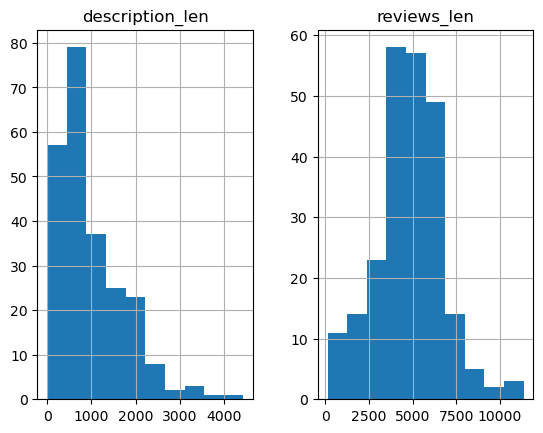

In [459]:
listings[['description_len', 'reviews_len']].hist()

In [537]:
MODEL = "sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2"
#MODEL = 'sentence-transformers/all-MiniLM-L6-v2'

model = SentenceTransformer(MODEL, device = 'cpu')

In [538]:
tok = model.tokenizer
MAX_TOK  = 512 

def chunk_text(text: str, max_tok: int = MAX_TOK):

    if not text: 
        return []
    ids = tok(text, add_special_tokens=False)["input_ids"]
    for i in range(0, len(ids), max_tok):
        chunk_ids = ids[i : i + max_tok]
        yield tok.decode(chunk_ids, skip_special_tokens=True)
        

In [539]:
import tqdm

desc_chunks, rev_chunks  = [], []
desc_ptrs,  rev_ptrs     = [], []  # (listing_id, local_chunk_id)

for lid, row in tqdm.tqdm(listings.iterrows(), total=len(listings)):
    # description
    d_chunks = list(chunk_text(row["description"]))
    desc_ptrs += [(lid, i) for i in range(len(d_chunks))]
    desc_chunks += d_chunks
    
    # reviews  (у вас это list[str])
    r_text = " ".join(row["reviews"]) if isinstance(row["reviews"], list) else str(row["reviews"])
    r_chunks = list(chunk_text(r_text))
    rev_ptrs += [(lid, i) for i in range(len(r_chunks))]
    rev_chunks += r_chunks

100%|████████████████████████████████████████| 236/236 [00:01<00:00, 202.37it/s]


In [540]:
%%time
desc_embed = [model.encode(x, normalize_embeddings=True,
                              convert_to_tensor=False).astype("float32") 
              for x in tqdm.tqdm(desc_chunks, total = len(desc_chunks))]

100%|█████████████████████████████████████████| 259/259 [00:03<00:00, 66.40it/s]

CPU times: user 13.5 s, sys: 1.63 s, total: 15.1 s
Wall time: 3.9 s


In [541]:
%%time
rev_embed = [model.encode(x, normalize_embeddings=True,
                              convert_to_tensor=False).astype("float32") 
              for x in tqdm.tqdm(rev_chunks, total = len(rev_chunks))]

100%|█████████████████████████████████████████| 693/693 [00:11<00:00, 60.18it/s]

CPU times: user 39.3 s, sys: 4.9 s, total: 44.2 s
Wall time: 11.5 s


In [545]:
def as_unit(vec):
    # если encode делался без normalize_embeddings=True
    n = np.linalg.norm(vec)
    return vec if n == 0 else vec / n

desc_embed = [as_unit(v).astype("float32") for v in desc_embed]
rev_embed  = [as_unit(v).astype("float32") for v in rev_embed]

# Делать np.vstack удобно, но не обязательно. 
# Здесь оставим списки для карт чанков, а для быстрой математики соберём массивы:
DESC_MAT = np.vstack(desc_embed)              # shape (N_d_chunks, 384)
REV_MAT  = np.vstack(rev_embed)

In [546]:
from collections import defaultdict

# 2.1  Карта "id -> список chunk‑векторов"
lid2dchunks = defaultdict(list)
for (lid, _), v in zip(desc_ptrs, desc_embed):
    lid2dchunks[lid].append(v)

lid2rchunks = defaultdict(list)
for (lid, _), v in zip(rev_ptrs, rev_embed):
    lid2rchunks[lid].append(v)

# 2.2  Усредняем для каждого lid
ids_all = sorted(set(lid2dchunks) & set(lid2rchunks))   # пересечение
mean_desc = np.vstack([np.mean(lid2dchunks[i], axis=0) for i in ids_all])
mean_rev  = np.vstack([np.mean(lid2rchunks[i], axis=0) for i in ids_all])
LIDS      = np.array(ids_all)      

In [551]:
def search_hybrid(
        query: str,
        top_n: int = 5,
        *,
        w1=0.4, w2=0.2, w4=0.4,
        use_chunks: bool = True
    ):
    """
    Гибридное ранжирование объявления:
        mean_desc • q   (общая тема описания)
        mean_rev  • q   (общая тема отзывов)
        max(chunk_rev • q)  (локальное совпадение в отзывах)
    """
    # 1. эмбеддинг запроса
    q = model.encode(query,
                     normalize_embeddings=True,
                     convert_to_tensor=False).astype("float32")

    # 2. быстрый NumPy‑scoring
    sim_desc = mean_desc @ q           # (L,)
    sim_rev  = mean_rev  @ q

    # берём top‑K позиций (не id!)
    pos_desc = np.argpartition(-sim_desc, k_desc)[:k_desc]
    pos_rev  = np.argpartition(-sim_rev,  k_rev) [:k_rev]

    # набор кандидатов (объединяем индексы)
    cand_pos = np.unique(np.concatenate([pos_desc, pos_rev]))

    results = []
    for pos in cand_pos:
        s = w1 * sim_desc[pos] + w2 * sim_rev[pos]
        max_r = max((v @ q for v in lid2rchunks.get(pos, [])), default=0.0)
        s += w4 * max_r

        results.append((s, pos))

    results.sort(reverse=True)
    top = results[:top_n]

    # listings — DataFrame с вашими объявлениями (объявлен ниже в коде Flask)
    return listings.loc[[id for _, id in top]] \
                   .assign(score=[round(s, 3) for s, _ in top]).sort_values('score', ascending = False)

In [567]:
len(mean_rev)

235

In [609]:
search_hybrid(
    "балкон и красивый вид",
    top_n=200)

,names,links,img,price,rating,ID,description,reviews,guests,bedrooms,beds,bathrooms,amenities,description_len,reviews_full,reviews_len,score
78,Современный комфорт: квартира с 2 спальнями в ...,www.airbnb.ru/rooms/888936499572941970,https://a0.muscache.com/im/pictures/miso/Hosti...,69,"4,93",888936499572941952,Откройте для себя очарование Тбилиси в наших у...,[Отличная квартира и комфортное пребывание... ...,3,2,2,"1,5 ванные","[Стиральная машина, Полотенца, простыни, мыло ...",1600,Отличная квартира и комфортное пребывание... Н...,4092,0.212
42,Nina's Viewpoint: потрясающие виды и уютные ба...,www.airbnb.ru/rooms/32630365,https://a0.muscache.com/im/pictures/0fc1fa0e-f...,45,"4,89",32630365,"Жилье Нины расположено в старом Тбилиси, в нед...","[Нам очень понравилось жить в этой квартире, б...",2,1,1,1 ванная,"[Фен, Шампунь, Гель для душа, Горячая вода, Ге...",1505,"Нам очень понравилось жить в этой квартире, бл...",10197,0.188
58,Дизайнерская квартира с прекрасным видом,www.airbnb.ru/rooms/1070101477456528842,https://a0.muscache.com/im/pictures/miso/Hosti...,167,"5,0",1070101477456528896,Наслаждайтесь стильным пребыванием в центре го...,[Потрясающая аренда. Вид на Тбилиси был потряс...,2,1,1,1 год принимает гостей,"[Кондиционер, Центральное отопление, Wi-Fi, Ра...",745,Потрясающая аренда. Вид на Тбилиси был потряса...,4493,0.181
24,Комфортабельная студия в Тбилиси - Wehost,www.airbnb.ru/rooms/828679885862531706,https://a0.muscache.com/im/pictures/miso/Hosti...,21,"4,73",828679885862531712,"Наша уютная квартира-студия Wehost в Авлабари,...",[Возникла проблема с горячей водой. Всё осталь...,2,1,2,1 ванная,"[Фен, Чистящие средства, Шампунь, Гель для душ...",1789,Возникла проблема с горячей водой. Всё остальн...,4272,0.178
75,Квартира с панорамным видом,www.airbnb.ru/rooms/1128935959511733680,https://a0.muscache.com/im/pictures/miso/Hosti...,83,"5,0",1128935959511733632,Наша квартира класса люкс на верхнем этаже пре...,"[Энн была исключительной хозяйкой, которая был...",2,1,2,"1,5 ванные","[Фен, Чистящие средства, Биде, Горячая вода, С...",1765,"Энн была исключительной хозяйкой, которая была...",7359,0.177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,"LiL home II - центр Тбилиси,Грузия",www.airbnb.ru/rooms/35225862,https://a0.muscache.com/im/pictures/miso/Hosti...,42,"4,87",35225862,Lil Home расположен в отремонтированном истори...,[Очень милое место для пары. Нам очень понрави...,4,1,2,1 ванная,"[Плечики, Постельное белье, Утюг, Телевизор + ...",705,Очень милое место для пары. Нам очень понравил...,4188,0.071
180,Просторная квартира с видовой террасой на Тбилиси,www.airbnb.ru/rooms/615087537692355869,https://a0.muscache.com/im/pictures/364043b7-4...,25,"4,87",615087537692355840,Уютная квартире с большой террасой (25 метров)...,[Я провела в квартире месяц. Прекрасно!!!! Оче...,3,1,1,1 ванная,"[Вид на горы, Чистящие средства, Гель для душа...",1096,Я провела в квартире месяц. Прекрасно!!!! Очен...,5767,0.071
127,Chic 1BR Sololaki Center Retreat - By Wehost,www.airbnb.ru/rooms/938852194286626179,https://a0.muscache.com/im/pictures/prohost-ap...,45,"4,73",938852194286626176,Наша уютная квартира с одной спальней в центре...,"[Отличная квартира прямо в центре города, но ч...",2,1,1,1 ванная,"[Отопление, Датчик дыма, Wi-Fi, Гости могут го...",1885,"Отличная квартира прямо в центре города, но чт...",6851,0.070
11,Уютная и прекрасная квартира в центре Тбилиси.,www.airbnb.ru/rooms/703466079905906517,https://a0.muscache.com/im/pictures/fc2f3cac-4...,23,"5,0",703466079905906560,Жилье расположен недалеко от стадиона Dinamo A...,[Какое прекрасное местечко! Близко ко всем мес...,2,1,1,"1,5 ванные","[Ванна, Фен, Чистящие средства, Горячая вода, ...",213,Какое прекрасное местечко! Близко ко всем мест...,5278,0.070


In [577]:
t[t['names'] == 'Loft-Studio at Vera District']

,names,links,img,price,rating,ID,description,reviews,guests,bedrooms,beds,bathrooms,amenities,description_len,reviews_full,reviews_len,score
167,Loft-Studio at Vera District,www.airbnb.ru/rooms/467014,https://a0.muscache.com/im/pictures/hosting/Ho...,34,"4,83",467014,Самая большая часть квартиры - балкон с прекра...,[Отличное место с удивительным видом прямо в ц...,2,1,1,1 ванная,"[Фен, Чистящие средства, Шампунь, Горячая вода...",2816,Отличное место с удивительным видом прямо в це...,5815,0.488


In [599]:
s = w1 * model.encode(listings.iloc[167,6]) @ q + w2 * model.encode(listings.iloc[167,14]) @ q

In [601]:
s

1.222955

In [301]:
import numpy as np, pickle

In [605]:
np.save("mean_desc.npy", mean_desc)   # создаст бинарный файл ~0.6 МБ на 10 k объявлений
np.save("mean_rev.npy",  mean_rev)

with open("lid2rchunks.pkl", "wb") as f:
    pickle.dump(lid2rchunks, f, protocol=pickle.HIGHEST_PROTOCOL)